<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula08a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

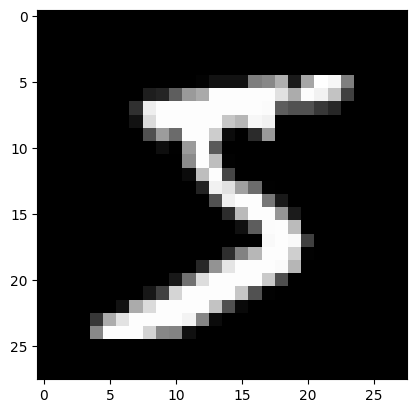

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [4]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 16ms/step - loss: 0.2662 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.1087 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0719 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0528 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0385 - accuracy: 0.9884


In [10]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 82ms/step


array([1.0071527e-07, 4.3258872e-09, 4.1424073e-06, 1.1524067e-04,
       4.3179748e-12, 9.5753528e-08, 9.4811355e-13, 9.9987721e-01,
       5.6016978e-07, 2.5466438e-06], dtype=float32)

In [11]:
predicted[0].argmax()

7

In [12]:
predicted[0][7]

0.9998772

In [13]:
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9784
test_acc: 0.9783999919891357


In [15]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2658 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1102 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0723 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0520 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9801

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2628 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1076 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0714 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0514 - accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9815

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2614 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0698 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0508 - accuracy: 0.9843
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9772

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2640 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1069 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0511 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9806

In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 23s 48ms/step - loss: 0.2158 - accuracy: 0.9339
Epoch 2/5
469/469 [==============================] - 21s 45ms/step - loss: 0.0693 - accuracy: 0.9786
Epoch 3/5
469/469 [==============================] - 21s 45ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 4/5
469/469 [==============================] - 21s 46ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 2s 7ms/step


0.982